In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

datas= pd.read_csv('Iris.csv')
datas.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X=datas.drop('Species', axis=1) #feature
Y=datas['Species'] #target
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [ ]:
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(150, 5) (120, 5) (30, 5)


In [ ]:
col=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
new=datas[col]
sc = StandardScaler()
data_1 = sc.fit_transform(new)
df = pd.DataFrame(datas, columns=new.columns)
print("\nStandardized Data:")
print(datas.head())


Standardized Data:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, Y_train)

SVC(random_state=42)

Confusion Matrix:
[[13  1  0]
 [ 0  8  0]
 [ 0  0  8]]


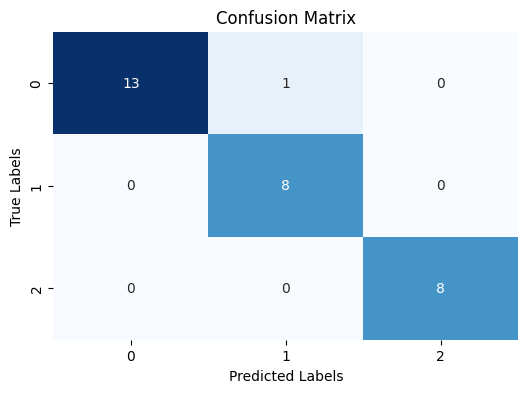

In [ ]:
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9666666666666667

In [ ]:
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

